In [23]:
import os 
from pathlib import Path
from dotenv import load_dotenv
import pickle
import pandas as pd
import numpy as np
import torch
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from setup_plot import setup_plot
import matplotlib.ticker as mtick
from pathlib import Path
import os
from dotenv import load_dotenv
import pandas as pd
import math
load_dotenv()
base_path = Path.home() / Path(os.environ.get("DATA_PATH"))
print(base_path)

/home/aayush/rsys_data


In [24]:
load_dotenv()

True

In [25]:
df = pd.read_csv(
   base_path/ Path("behaviors.tsv"), 
    sep="\t",
    names=["impressionId","userId","timestamp","click_history","impressions"])

print(f"The dataset originally consist of {len(df)} number of interactions.")


df.head()

The dataset originally consist of 2232748 number of interactions.


,impressionId,userId,timestamp,click_history,impressions
0,1,U87243,11/10/2019 11:30:54 AM,N8668 N39081 N65259 N79529 N73408 N43615 N2937...,N78206-0 N26368-0 N7578-0 N58592-0 N19858-0 N5...
1,2,U598644,11/12/2019 1:45:29 PM,N56056 N8726 N70353 N67998 N83823 N111108 N107...,N47996-0 N82719-0 N117066-0 N8491-0 N123784-0 ...
2,3,U532401,11/13/2019 11:23:03 AM,N128643 N87446 N122948 N9375 N82348 N129412 N5...,N103852-0 N53474-0 N127836-0 N47925-1
3,4,U593596,11/12/2019 12:24:09 PM,N31043 N39592 N4104 N8223 N114581 N92747 N1207...,N38902-0 N76434-0 N71593-0 N100073-0 N108736-0...
4,5,U239687,11/14/2019 8:03:01 PM,N65250 N122359 N71723 N53796 N41663 N41484 N11...,N76209-0 N48841-0 N67937-0 N62235-0 N6307-0 N3...


In [26]:
news = pd.read_csv(
    base_path/ Path("news.tsv"), 
    sep="\t",
    names=["itemId","category","subcategory","title","abstract","url","title_entities","abstract_entities"])
print(f"The article data consist in total of {len(news)} number of articles.")
categories = news['category'].unique()
news["num_category"] = news["category"].factorize()[0]
article_category = news.set_index("itemId")["num_category"].to_dict()
def process_impression(impression_list):
    list_of_strings = impression_list.split()
    click = [x.split('-')[0] for x in list_of_strings if x.split('-')[1] == '1']
    non_click = [x.split('-')[0] for x in list_of_strings]
    return click,non_click


df['click'], df['presented_slate'] = zip(*df['impressions'].map(process_impression))
df

The article data consist in total of 101527 number of articles.


,impressionId,userId,timestamp,click_history,impressions,click,presented_slate
0,1,U87243,11/10/2019 11:30:54 AM,N8668 N39081 N65259 N79529 N73408 N43615 N2937...,N78206-0 N26368-0 N7578-0 N58592-0 N19858-0 N5...,"[N94157, N78699, N71090, N31174]","[N78206, N26368, N7578, N58592, N19858, N58258..."
1,2,U598644,11/12/2019 1:45:29 PM,N56056 N8726 N70353 N67998 N83823 N111108 N107...,N47996-0 N82719-0 N117066-0 N8491-0 N123784-0 ...,"[N25587, N36266]","[N47996, N82719, N117066, N8491, N123784, N214..."
2,3,U532401,11/13/2019 11:23:03 AM,N128643 N87446 N122948 N9375 N82348 N129412 N5...,N103852-0 N53474-0 N127836-0 N47925-1,[N47925],"[N103852, N53474, N127836, N47925]"
3,4,U593596,11/12/2019 12:24:09 PM,N31043 N39592 N4104 N8223 N114581 N92747 N1207...,N38902-0 N76434-0 N71593-0 N100073-0 N108736-0...,[N114935],"[N38902, N76434, N71593, N100073, N108736, N30..."
4,5,U239687,11/14/2019 8:03:01 PM,N65250 N122359 N71723 N53796 N41663 N41484 N11...,N76209-0 N48841-0 N67937-0 N62235-0 N6307-0 N3...,[N86258],"[N76209, N48841, N67937, N62235, N6307, N34254..."
...,...,...,...,...,...,...,...
2232743,2232744,U316192,11/13/2019 6:50:02 PM,N122359 N37069 N95876 N28787 N73408 N11266 N61321,N113723-0 N123683-1 N5287-0 N76677-0 N53474-0,[N123683],"[N113723, N123683, N5287, N76677, N53474]"
2232744,2232745,U451238,11/12/2019 8:54:06 AM,N12575 N93816 N71643 N87236 N87236,N18861-0 N20990-0 N43085-0 N7937-1,[N7937],"[N18861, N20990, N43085, N7937]"
2232745,2232746,U151246,11/13/2019 12:42:51 PM,N27587 N49668,N39887-1 N22811-0 N110709-1 N1923-0 N24001-1 N...,"[N39887, N110709, N24001, N127572, N10285]","[N39887, N22811, N110709, N1923, N24001, N7667..."
2232746,2232747,U330725,11/12/2019 1:22:57 PM,N121944 N91510 N42280 N60061 N63032 N125223 N4...,N18947-0 N88808-1 N10012-0 N38902-0 N33078-0 N...,[N88808],"[N18947, N88808, N10012, N38902, N33078, N1003..."


In [27]:
valid_article_ids = set(news['itemId'])
print(len(news['itemId']))
def filter_click_list(click_list):
    return [item for item in click_list if item in valid_article_ids]
def filter_click_history_list(click_list):
    if pd.notna(click_list['click_history']):
     return [item for item in click_list['click_history'].split() if item in valid_article_ids]
    else:
     return []
behaviors_df=df

behaviors_df['click'] = behaviors_df['click'].apply(filter_click_list)
behaviors_df['presented_slate'] = behaviors_df['presented_slate'].apply(filter_click_list)
behaviors_df['click_history'] = behaviors_df.apply(filter_click_history_list,axis=1)
# behaviors_df[behaviors_df['click'].apply(lambda x: any(item in valid_article_ids for item in x))]
# filtered_behaviors_df = filtered_behaviors_df[filtered_behaviors_df['presented_slate'].apply(lambda x: any(item in valid_article_ids for item in x))]
filtered_behaviors_df = behaviors_df[behaviors_df['click'].apply(lambda x: len(x) > 0)]
filtered_df_2 = filtered_behaviors_df[
    (df['click'].apply(lambda x: len(x) != 1 or (len(x) == 0 and isinstance(x, list))))
].reset_index()
test_data = filtered_df_2.sample(n=30000, random_state=42)
filtered_df_2 = filtered_df_2.drop(test_data.index)

101527


In [28]:
def entropy_based_diversity(row):

  # Normalize the counts to get probabilities
    items_hist = row["click_history"]
    categories = [
        article_category.get(article_id, 0) for article_id in items_hist
    ]
    category_counts = [categories.count(i) for i in range(0, 18)]
    probs = category_counts / np.sum(category_counts)

    # Handle zero probabilities (avoid log of zero)
    probs = np.where(probs > 0, probs, 1e-10)

    # Calculate entropy
    entropy = -np.sum(probs * np.log2(probs))

    # Normalize entropy (optional, comment out if not needed)
    diversity_score = entropy / np.log2(len(category_counts))

    return diversity_score
test_data['diversity_score']=test_data.apply(entropy_based_diversity,axis=1)

/tmp/ipykernel_59723/155521801.py:9: RuntimeWarning: divide by zero encountered in divide
  probs = category_counts / np.sum(category_counts)
/tmp/ipykernel_59723/155521801.py:9: RuntimeWarning: invalid value encountered in divide
  probs = category_counts / np.sum(category_counts)


In [29]:
test_data['diversity_score'].min()

1.3542876093347509e-08

Text(0, 0.5, 'Frequency')

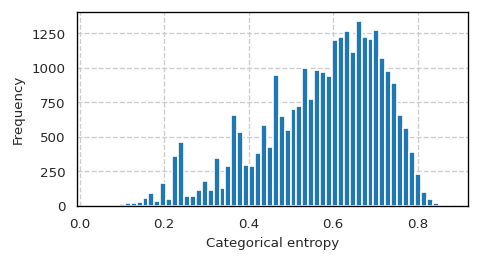

In [30]:
k=test_data['diversity_score'].min()
non_zero_scores = test_data[test_data['diversity_score'] > 1.3542876093347509e-07]
import seaborn as sns
import matplotlib.pyplot as plt
non_zero_scores['diversity_score'].hist(bins=60)
plt.xlabel('Categorical entropy')
plt.ylabel('Frequency')

In [31]:
q1 = non_zero_scores['diversity_score'].quantile(0.25)
q1

0.4796249442892197

In [32]:
specialists=non_zero_scores[non_zero_scores['diversity_score'] < q1]
specialists.reset_index(inplace=True, drop=True)
# feather_path_test=base_path/ Path("MINDlarge_train/entropy_specialist_test_50.feather")
# specialists.to_feather(feather_path_test)
specialists

,index,impressionId,userId,timestamp,click_history,impressions,click,presented_slate,diversity_score
0,85726,85727,U84904,11/10/2019 12:18:15 PM,"[N115720, N25951, N15371, N48804, N112687]",N14509-0 N50858-0 N123362-0 N24150-0 N15420-0 ...,"[N116064, N94581]","[N14509, N50858, N123362, N24150, N15420, N373...",0.364977
1,331408,331409,U197953,11/10/2019 5:57:49 PM,"[N71399, N116183, N46277, N99021, N49779, N469...",N97143-0 N13888-0 N40064-0 N71090-0 N83421-0 N...,"[N20849, N78214]","[N97143, N13888, N40064, N71090, N83421, N1295...",0.363505
2,335674,335675,U708542,11/12/2019 3:25:08 AM,"[N126968, N115574, N95392, N126673, N108352, N...",N79048-0 N92498-0 N27097-0 N83412-1 N118883-0 ...,"[N83412, N125253]","[N79048, N92498, N27097, N83412, N118883, N520...",0.429859
3,620840,620841,U582290,11/13/2019 9:35:37 AM,"[N50108, N66812, N100670]",N109901-0 N100846-0 N46584-0 N10544-1 N10627-0...,"[N10544, N82657]","[N109901, N100846, N46584, N10544, N10627, N88...",0.220219
4,1832798,1832799,U217000,11/9/2019 1:45:00 PM,"[N108143, N28385, N104347, N54177, N99111]",N73137-0 N6865-0 N31855-0 N52920-0 N32209-0 N4...,"[N46798, N73939, N99362]","[N73137, N6865, N31855, N52920, N32209, N46798...",0.460902
...,...,...,...,...,...,...,...,...,...
7101,497097,497098,U599897,11/11/2019 10:40:16 AM,"[N26115, N125587, N90543, N12721, N121275, N64...",N53516-0 N123499-0 N24150-0 N69591-0 N22215-0 ...,"[N37861, N4872, N122543]","[N53516, N123499, N24150, N69591, N22215, N865...",0.407426
7102,2112019,2112020,U120094,11/10/2019 8:40:16 AM,"[N106076, N67497]",N15289-0 N26368-1 N58258-0 N11687-0 N10654-0 N...,"[N26368, N4858, N28743, N54671, N87236]","[N15289, N26368, N58258, N11687, N10654, N2559...",0.239812
7103,888068,888069,U180424,11/14/2019 7:40:59 PM,"[N43746, N85005, N93877, N86320, N117592, N102...",N118623-0 N116098-0 N100738-0 N78508-0 N61964-...,"[N94999, N122944, N45782]","[N118623, N116098, N100738, N78508, N61964, N1...",0.407787
7104,382752,382753,U189519,11/12/2019 8:33:22 AM,"[N46591, N6373, N111923, N23204, N26256, N1890...",N96351-0 N84381-0 N46329-0 N118883-0 N48418-0 ...,"[N113126, N100804]","[N96351, N84381, N46329, N118883, N48418, N733...",0.381635


In [33]:
generalists=non_zero_scores[non_zero_scores['diversity_score'] > q1]
generalists.reset_index(inplace=True, drop=True)
# feather_path_test=base_path/ Path("MINDlarge_train/entropy_generalist_test_50.feather")
# generalists.to_feather(feather_path_test)
generalists

,index,impressionId,userId,timestamp,click_history,impressions,click,presented_slate,diversity_score
0,2031425,2031426,U248767,11/11/2019 11:46:27 AM,"[N9740, N65259, N128643, N128965, N15471, N454...",N112156-1 N47026-0 N12613-0 N99177-0 N31879-0 ...,"[N112156, N125945]","[N112156, N47026, N12613, N99177, N31879, N878...",0.721937
1,1883711,1883712,U550928,11/14/2019 1:54:08 PM,"[N73122, N47522, N59130, N63174, N107969, N1713]",N92199-0 N67937-0 N76209-0 N9667-0 N79044-0 N3...,"[N74875, N14675]","[N92199, N67937, N76209, N9667, N79044, N36222...",0.539969
2,1652315,1652316,U211063,11/11/2019 10:00:34 AM,"[N128643, N92279, N57148, N60015, N113326, N12...",N122543-0 N37376-0 N85452-0 N128389-0 N98178-0...,"[N3786, N38457]","[N122543, N37376, N85452, N128389, N98178, N23...",0.653418
3,1763793,1763794,U239888,11/10/2019 7:28:50 PM,"[N9375, N71068, N73408, N37407, N14200, N91597...",N81111-0 N96964-0 N40064-0 N3604-0 N102834-0 N...,"[N67101, N19858]","[N81111, N96964, N40064, N3604, N102834, N1232...",0.659484
4,1025245,1025246,U261695,11/10/2019 10:40:55 AM,"[N29227, N129790, N128643, N89341, N3758, N560...",N94296-0 N26368-0 N49456-0 N122694-0 N3604-0 N...,"[N31174, N69591, N116064]","[N94296, N26368, N49456, N122694, N3604, N1272...",0.715441
...,...,...,...,...,...,...,...,...,...
21584,2119064,2119065,U319954,11/14/2019 10:55:38 AM,"[N71496, N16894, N128643, N60911, N62936, N463...",N100456-1 N129503-0 N56873-0 N64873-0 N51163-0...,"[N100456, N42649]","[N100456, N129503, N56873, N64873, N51163, N42...",0.745111
21585,2152146,2152147,U28916,11/9/2019 7:06:55 AM,"[N65612, N105888, N15899, N9372, N92079, N9517...",N130031-0 N6293-0 N31855-0 N95605-0 N118589-1 ...,"[N118589, N65783]","[N130031, N6293, N31855, N95605, N118589, N322...",0.516250
21586,829747,829748,U688452,11/12/2019 6:44:12 AM,"[N46333, N71496, N128643, N127175, N18389, N11...",N118035-0 N87159-0 N120192-0 N27097-0 N52079-0...,"[N30263, N113126, N35619]","[N118035, N87159, N120192, N27097, N52079, N30...",0.722590
21587,1752775,1752776,U54431,11/12/2019 8:44:56 AM,"[N33446, N104760, N18850, N65119, N85659, N223...",N20990-0 N118883-0 N125841-1 N116647-0 N100073...,"[N125841, N100073, N115021]","[N20990, N118883, N125841, N116647, N100073, N...",0.730924


In [34]:
save_path = os.environ.get("TEST_PATH")
BASE_LOAD_PATH = Path.home() / save_path
df = pd.read_csv(BASE_LOAD_PATH / "serving_time_slateq.csv")

In [35]:
df

,alg_name,entropy_group,hit_documents,diverse_score
0,SlateQ,0.1,0.125800,0.596000
1,SlateQ,0.2,0.113964,0.589683
2,SlateQ,0.3,0.146617,0.581953
3,SlateQ,0.4,0.119782,0.587229
4,SlateQ,0.5,0.136147,0.602802
5,SlateQ,0.6,0.117524,0.605172
6,SlateQ,0.7,0.148836,0.604044
7,SlateQ,0.8,0.137373,0.613506
8,SlateQ,0.9,0.212409,0.594118
9,SlateWP,0.1,0.129300,0.600000


In [36]:
df = df[df['entropy_group'] != 0.9]

In [37]:

from setup_plot import setup_plot
setup_plot(font_size=8, w_pts=506*0.6, fig_ratio=0.5)

In [38]:
sns.set_style("whitegrid", {"grid.linestyle": "--", "axes.edgecolor": "black"})

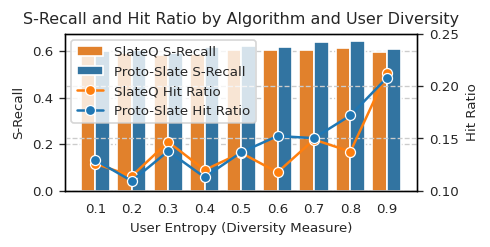

<Figure size 504.11x252.055 with 0 Axes>

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your data is in a pandas DataFrame called 'df'

# Create the figure and primary y-axis (S-Recall)
fig, ax1 = plt.subplots()

# Plot the bar plot
sns.barplot(
    x='entropy_group',
    y='diverse_score',
    data=df,
    ax=ax1,
    hue="alg_name",
    palette={"SlateWP": "#1f77b4", "SlateQ": "#ff7f0e"}  # Set colors for SlateWP and SlateQ
)
ax1.set_ylabel('S-Recall')

# Get the positions of the bars on the x-axis
bar_positions = np.arange(len(df['entropy_group'].unique()))

# Calculate the width of each bar
bar_width = 0.35

# Create the secondary y-axis (Hit Ratio) and line plot
ax2 = ax1.twinx()

# Plot the line plot for SlateQ
sns.lineplot(
    x=bar_positions,  # Use the same positions as the bar plot
    y='hit_documents',
    data=df[df['alg_name'] == 'SlateQ'],  # Filter data for SlateQ
    ax=ax2,
    marker='o',
    color='#ff7f0e',
    label='SlateQ Hit Ratio'  # Set legend label for SlateQ Hit Ratio
)

# Plot the line plot for SlateWP
sns.lineplot(
    x=bar_positions,  # Use the same positions as the bar plot
    y='hit_documents',
    data=df[df['alg_name'] == 'SlateWP'],  # Filter data for SlateWP
    ax=ax2,
    marker='o',
    color='#1f77b4',
    label='Proto-Slate Hit Ratio'  # Set legend label for SlateWP Hit Ratio
)

ax2.set_ylabel('Hit Ratio')

# Set the x-axis label
ax1.set_xlabel('User Entropy (Diversity Measure)')

# Set the x-axis tick labels to match the original data
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(df['entropy_group'].unique())

# Set the y-axis limits for better visualization
ax2.set_ylim(0.1, 0.25)

# Combine legend labels for both bar plot and line plots
handles, labels = [], []
for ax in [ax1, ax2]:
    for h, l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

# Display the combined legend
plt.legend(handles, labels, title="", loc='best')
ax1.get_legend().remove()
# Customize the plot for readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("S-Recall and Hit Ratio by Algorithm and User Diversity")
legend_labels = ["SlateQ S-Recall", "Proto-Slate S-Recall", "SlateQ Hit Ratio", "Proto-Slate Hit Ratio"]
plt.legend(handles, legend_labels, title="")

plt.tight_layout()  # Adjust spacing between elements for clarity
plt.show()
plt.savefig("./performance_metric.pdf", dpi=300, bbox_inches='tight')


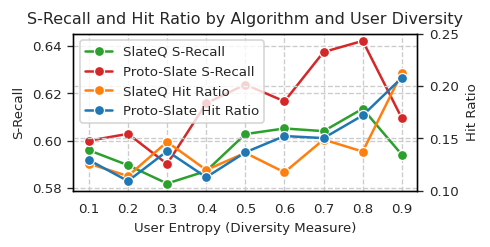

<Figure size 504.11x252.055 with 0 Axes>

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your data is in a pandas DataFrame called 'df'

# Create the figure and primary y-axis (S-Recall)
fig, ax1 = plt.subplots()

# Plot the bar plot
sns.lineplot(
    x=bar_positions,  # Use the same positions as the bar plot
    y='diverse_score',
    data=df[df['alg_name'] == 'SlateQ'],  # Filter data for SlateQ
    ax=ax1,
    marker='o',
    color='#2ca02c',
    label='SlateQ S-Recall'  # Set legend label for SlateQ Hit Ratio
)
sns.lineplot(
    x=bar_positions,  # Use the same positions as the bar plot
    y='diverse_score',
    data=df[df['alg_name'] == 'SlateWP'],  # Filter data for SlateQ
    ax=ax1,
    marker='o',
    color='#d62728',
    label='Proto-Slate S-Recall'  # Set legend label for SlateQ Hit Ratio
)
ax1.set_ylabel('S-Recall')

# Get the positions of the bars on the x-axis
bar_positions = np.arange(len(df['entropy_group'].unique()))

# Calculate the width of each bar
bar_width = 0.35

# Create the secondary y-axis (Hit Ratio) and line plot
ax2 = ax1.twinx()

# Plot the line plot for SlateQ
sns.lineplot(
    x=bar_positions,  # Use the same positions as the bar plot
    y='hit_documents',
    data=df[df['alg_name'] == 'SlateQ'],  # Filter data for SlateQ
    ax=ax2,
    marker='o',
    color='#ff7f0e',
    label='SlateQ Hit Ratio'  # Set legend label for SlateQ Hit Ratio
)

# Plot the line plot for SlateWP
sns.lineplot(
    x=bar_positions,  # Use the same positions as the bar plot
    y='hit_documents',
    data=df[df['alg_name'] == 'SlateWP'],  # Filter data for SlateWP
    ax=ax2,
    marker='o',
    color='#1f77b4',
    label='Proto-Slate Hit Ratio'  # Set legend label for SlateWP Hit Ratio
)

ax2.set_ylabel('Hit Ratio')

# Set the x-axis label
ax1.set_xlabel('User Entropy (Diversity Measure)')

# Set the x-axis tick labels to match the original data
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(df['entropy_group'].unique())

# Set the y-axis limits for better visualization
ax2.set_ylim(0.1, 0.25)

# Combine legend labels for both bar plot and line plots
handles, labels = [], []
for ax in [ax1, ax2]:
    for h, l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

# Display the combined legend
plt.legend(handles, labels, title="", loc='best')
ax1.get_legend().remove()
# Customize the plot for readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("S-Recall and Hit Ratio by Algorithm and User Diversity")
legend_labels = ["SlateQ S-Recall", "Proto-Slate S-Recall", "SlateQ Hit Ratio", "Proto-Slate Hit Ratio"]
plt.legend(handles, legend_labels, title="")

plt.tight_layout()  # Adjust spacing between elements for clarity
plt.show()
plt.savefig("./performance_metric.pdf", dpi=300, bbox_inches='tight')

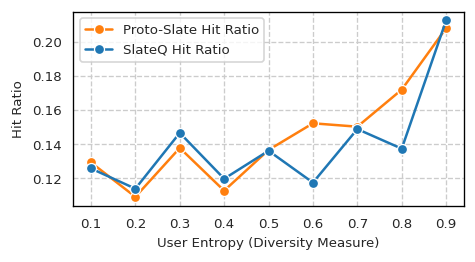

In [41]:

sns.lineplot(data=df, x="entropy_group", y="hit_documents", hue="alg_name", marker='o', hue_order=["SlateWP", "SlateQ"], palette=["#ff7f0e", "#1f77b4"])
plt.ylabel("Hit Ratio")
plt.xlabel("User Entropy (Diversity Measure)")
handles, labels = [], []
for h, l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
legend_labels = ["Proto-Slate Hit Ratio","SlateQ Hit Ratio"]
# plt.title("Hit Ratio by Algorithm and User Diversity")
plt.legend(handles,legend_labels, title="")

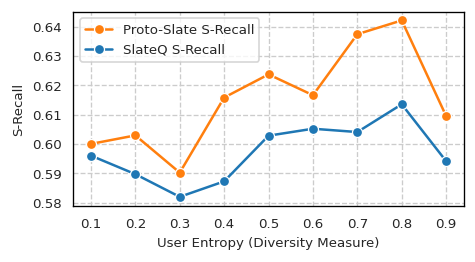

In [42]:

sns.lineplot(data=df, x="entropy_group", y="diverse_score", hue="alg_name", marker='o', hue_order=["SlateWP", "SlateQ"], palette=["#ff7f0e", "#1f77b4"])
plt.ylabel("S-Recall")
plt.xlabel("User Entropy (Diversity Measure)")
handles, labels = [], []
for h, l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
legend_labels = ["Proto-Slate S-Recall","SlateQ S-Recall"]
# plt.title("S-Recall by Algorithm and User Diversity")
plt.legend(handles,legend_labels, title="")

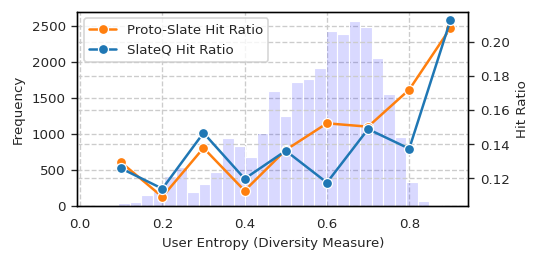

In [43]:
fig, ax = plt.subplots()

ax2 = ax.twinx()

sns.lineplot(data=df, x="entropy_group", y="hit_documents", hue="alg_name", marker='o', hue_order=["SlateWP", "SlateQ"], palette=["#ff7f0e", "#1f77b4"],ax=ax2)
sns.histplot(non_zero_scores['diversity_score'], bins=30, kde=False, ax=ax, color='blue', alpha=0.15)
ax.set_ylabel('Frequency')
ax.set_xlabel('User Entropy (Diversity Measure)')
ax2.set_ylabel('Hit Ratio')
handles, labels = [], []
for h, l in zip(*ax2.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
legend_labels = ["Proto-Slate Hit Ratio","SlateQ Hit Ratio"]
ax2.get_legend().remove()

# plt.title("Hit Ratio by Algorithm and User Diversity")
plt.legend(handles,legend_labels, title="")

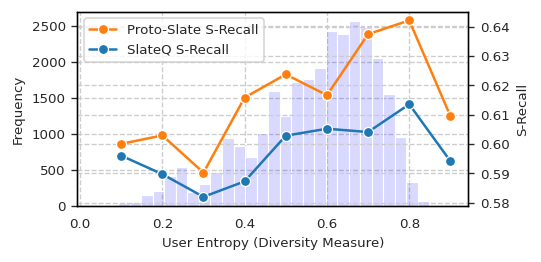

In [44]:
fig, ax = plt.subplots()


ax2 = ax.twinx()
sns.lineplot(data=df, x="entropy_group", y="diverse_score", hue="alg_name", marker='o', hue_order=["SlateWP", "SlateQ"], palette=["#ff7f0e", "#1f77b4"],ax=ax2)
sns.histplot(non_zero_scores['diversity_score'], bins=30, kde=False, ax=ax, color='blue', alpha=0.15)
ax.set_ylabel('Frequency')
ax.set_xlabel('User Entropy (Diversity Measure)')
ax2.set_ylabel('S-Recall')
handles, labels = [], []
for h, l in zip(*ax2.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
legend_labels = ["Proto-Slate S-Recall","SlateQ S-Recall"]
ax2.get_legend().remove()

# plt.title("Hit Ratio by Algorithm and User Diversity")
plt.legend(handles,legend_labels, title="")